<a href="https://colab.research.google.com/github/drdamia/DFTB-/blob/main/sk_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Install conda and necessary packages



In [1]:
!pip install -q condacolab

In [2]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [3]:
!conda config --add channels conda-forge
!conda config --set channel_priority strict

In [1]:
!conda install -n base mamba dftbplus dftbplus-tools


Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - dftbplus
    - dftbplus-tools
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arpack-3.9.1               |nompi_hf03ea27_102         127 KB  conda-forge
    c-ares-1.34.6              |       hb03c661_0         203 KB  conda-forge
    ca-certificates-2026.1.4   |       hbd8a1cb_0         143 KB  conda-forge
    certifi-2026.1.4           |     pyhd8ed1ab_0         147 KB  conda-forge
    chimes-calculator-1.0.2    |       h0c14de7_0         185 KB  conda-forge
    conda-26.1.0               |  py311h38be061_0         1.2 MB  conda-forge
    conda-libmamba-solver-25.11.0|     pyhd8ed1ab_1          56 KB  conda-forge
    cpp-expected-1.3.1         |       h171cf75_0          24 KB  conda-forge
    dftbplu

In [2]:
!mamba install python=3.12 skprogs skprogs-python

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch     1%[+] 0.2s
conda-forge/linux-64   5%
conda-forge/noarch    15%[+] 0.3s
conda-forge/linux-64  13%
conda-forge/noarch    32%[+] 0.4s
conda-forge/linux-64  20%
conda-forge/noarch    45%[+] 0.5s
conda-forge/linux-64  25%
conda-forge/noarch    56%[+] 0.6s
conda-forge/linux-64  28%
conda-forge/noarch    61%[+] 0.7s
conda-forge/linux-64  34%
conda-forge/noarch    74%[+] 0.8s
conda-forge/linux-64  41%
conda-forge/noarch    88%conda-forge/noarch                                
[+] 0.9s
conda-forge/linux-64  48%[+] 1.0s
conda-forge/linux-64  58%[+] 1.1s
conda-forge/linux-64  65%[+] 1.2s
conda-forge/linux-64  72%[+] 1.3s
conda-forge/linux-64  75%[+] 1.4s
conda-forge/linux-64  82%[+] 1.5s
conda-forge/linux-64  89%[+] 1.6s
conda-forge/linux-64  96%conda-forge/linux-64                              

Pinned packages:

  - python=3.12

Pinned packages:

  - python_abi[version="=3.12",build="*cp312*"]

Pinned packages:

  - cudatoolkit*

In [3]:
!pip install ase

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 133.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 124.0 MB/s eta 0:00:00


In [4]:
import ase
print(f"ASE version: {ase.__version__}")

ASE version: 3.27.0


In [5]:
import os
os.chdir('/content')
!git clone https://github.com/drdamia/DFTB-.git

Cloning into 'DFTB-'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 197 (delta 28), reused 10 (delta 10), pack-reused 125 (from 1)
Receiving objects: 100% (197/197), 11.04 MiB | 21.36 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [6]:
'''
Module to generate homo- and hetero-nuclear Slater-Koster files.
'''


import sys
import argparse
import numpy as np


import sktools.common as sc
import sktools.skgen as skgen
from sktools.skdef import Skdef
from sktools import PACKAGE_VERSION


if sys.hexversion < 0x03020000:
    sys.exit('Program only works with Python 3.2 or greater')

if np.__version__.startswith('1.6.'):
    sys.exit('Program only works with Numpy 1.7.x or greater')


SCRIPTNAME = sc.get_script_name()

# Global script logger, will be overriden by the setup_logger() method in
# the respective subcommands depending on the command line loglevel options
logger = None


def main():
    '''Main driver routine.'''

    parser, subparsers = get_parser_and_subparser_container()
    setup_parser_main(parser)
    onecnt_common = get_onecnt_common_parser()
    setup_parser_atom(subparsers, onecnt_common, run_atom)
    setup_parser_denscomp(subparsers, onecnt_common, run_denscomp)
    setup_parser_wavecomp(subparsers, onecnt_common, run_wavecomp)
    twocnt_common = get_twocnt_common_parser()
    setup_parser_twocnt(subparsers, twocnt_common, run_twocnt)
    setup_parser_sktable(subparsers, twocnt_common, run_sktable)
    parse_command_line_and_run_subcommand(parser)


def run_atom(args):
    print('ARGS', args)
    setup_logger(args.loglevel)
    logger.info('Subcommand atom started')
    elements = convert_argument_to_elements(args.element)
    skdefs = merge_skdefs(args.configfiles)
    searchdirs = [args.builddir,] + args.includedirs
    resultdirs = []
    for elem in elements:
        calculator = skgen.run_atom(
            skdefs, elem, args.builddir, searchdirs, args.onecnt_binary,
            args.eigenonly, args.eigenspinonly)
        resultdirs.append(calculator.get_result_directory())
    logger.info('Subcommand atom finished')
    logger.info('Atom results in {}'.format(' '.join(resultdirs)))


def run_denscomp(args):
    setup_logger(args.loglevel)
    logger.info('Subcommand denscomp started')
    elements = convert_argument_to_elements(args.element)
    skdefs = merge_skdefs(args.configfiles)
    searchdirs = [args.builddir,] + args.includedirs
    resultdirs = []
    for elem in elements:
        calculator = skgen.run_denscomp(
            skdefs, elem, args.builddir, searchdirs, args.onecnt_binary)
        resultdirs.append(calculator.get_result_directory())
    logger.info('Subcommand densecomp finished')
    logger.info('Denscomp results in {}'.format(' '.join(resultdirs)))


def run_wavecomp(args):
    setup_logger(args.loglevel)
    logger.info('Subcommand wavecomp started')
    elements = convert_argument_to_elements(args.element)
    skdefs = merge_skdefs(args.configfiles)
    searchdirs = [args.builddir,] + args.includedirs
    resultdirs = []
    for elem in elements:
        calculator = skgen.run_wavecomp(
            skdefs, elem, args.builddir, searchdirs, args.onecnt_binary)
        dirnames = ' '.join(calculator.get_result_directories())
        resultdirs.append(dirnames)
    logger.info('Subcommand wavecomp finished')
    logger.info('Wavecomp results in {}'.format(' '.join(resultdirs)))


def run_twocnt(args):
    print('ARGS', args)
    setup_logger(args.loglevel)
    logger.info('Subcommand twocnt started')
    skdefs = merge_skdefs(args.configfiles)
    builddir = args.builddir
    searchdirs = [builddir,] + args.includedirs
    resultdirs = []
    element_pairs = convert_arguments_to_element_pairs(args.element1,
                                                       args.element2)
    for elem1, elem2 in element_pairs:
        calculator = skgen.run_twocnt(
            skdefs, elem1, elem2, builddir, searchdirs, args.onecnt_binary,
            args.twocnt_binary)
        resultdirs.append(calculator.get_result_directory())
    logger.info('Subcommand twocnt finished')
    logger.info('Twocnt results in {}'.format(' '.join(resultdirs)))


def run_sktable(args):
    setup_logger(args.loglevel)
    logger.info('Subcommand sktable started')
    skdefs = merge_skdefs(args.configfiles)
    builddir = args.builddir
    searchdirs = [builddir,] + args.includedirs
    workdir = args.outdir
    add_dummy_rep = args.dummyrep
    skfiles_written = []
    element_pairs = convert_arguments_to_element_pairs(args.element1,
                                                       args.element2)
    for elem1, elem2 in element_pairs:
        skfiles_written += skgen.run_sktable(
            skdefs, elem1, elem2, builddir, searchdirs, args.onecnt_binary,
            args.twocnt_binary, workdir, add_dummy_rep)
    logger.info('Directory with assembled SK-file(s): {}'.format(workdir))
    logger.info('SK-file(s) written: {}'.format(' '.join(skfiles_written)))


def get_parser_and_subparser_container():
    parser = argparse.ArgumentParser(
        description='General tool for generating Slater-Koster tables.')
    subparsers = parser.add_subparsers(title='available subcommands',
                                       help='')
    return parser, subparsers


def get_onecnt_common_parser():
    '''Common settings for all one-center calculations.'''
    onecnt_common = argparse.ArgumentParser(add_help=False)
    onecnt_common.add_argument(
        'element', help='element to process: either one element (e.g. N) or a '
        'comma separated list of element names *without* spaces in between '
        '(e.g. N,C,H)')
    return onecnt_common


def get_twocnt_common_parser():
    twocnt_common = argparse.ArgumentParser(add_help=False)
    twocnt_common.add_argument(
        'element1', help='first element of the element pair to process: '
        'either one element (e.g. N) or a comma separated list of element '
        'names *without* spaces in between (e.g. N,C,H)')
    twocnt_common.add_argument(
        'element2', help='second element of the element pair to process: '
        'either one element (e.g. N) or a comma separated list of element '
        'names *without* spaces in between (e.g. N,C,H)')
    return twocnt_common


def setup_parser_main(parser):
    parser.add_argument('--version', action='version',
                        version='sktools {}'.format(PACKAGE_VERSION))
    parser.add_argument(
        '-I', '--include-dir', action='append', default=[],
        dest='includedirs',
        help='directory to include in the search for calculation '
        '(default: build directory only)')
    parser.add_argument(
        '-c', '--config-file', action='append', dest='configfiles',
        default=['skdef.hsd',],
        help='config file(s) to be parsed (default: ./skdef.hsd)'
    )
    parser.add_argument(
        '-b', '--build-dir', default='_build', dest='builddir',
        help='build directory (default: _build)')
    parser.add_argument(
        '-o', '--onecenter-binary', dest='onecnt_binary', default=None,
        help='binary to use for the one-center calculations (default: depends '
        'on the calculator specified in the input)')
    parser.add_argument(
        '-t', '--twocenter-binary', dest='twocnt_binary', default=None,
        help='binary to use for the two-center calculationrs (default: depends '
        'on the calculator speciefied in the input)')
    parser.add_argument(
        '-l', '--log-level', dest='loglevel', default='info',
        choices=['debug', 'info', 'warning', 'error'],
        help='Logging level (default: info)')


def setup_parser_atom(subparsers, onecnt_common, target_function):
    parser_atom = subparsers.add_parser(
        'atom', parents=[onecnt_common],
        help='calculates the free atom to get eigenlevels, hubbard values, spin'
        ' couplings, etc.')
    parser_atom.add_argument(
        '-e', '--eigenlevels-only', dest='eigenonly', action='store_true',
        default=False, help='calculates only eigenlevels of the spin '
                            'unpolarized atom but no derivatives.')
    parser_atom.add_argument(
        '-s', '--spin-polarized', dest='eigenspinonly', action='store_true',
        default=False, help='calculates only the eigenlevels of the spin '
                            'polarized atom but no derivatives')
    parser_atom.set_defaults(func=target_function)


def setup_parser_denscomp(subparsers, onecnt_common, target_function):
    parser_denscomp = subparsers.add_parser(
        'denscomp', parents=[onecnt_common],
        help='calculates density compression')
    parser_denscomp.set_defaults(func=target_function)


def setup_parser_wavecomp(subparsers, onecnt_common, target_function):
    parser_wavecomp = subparsers.add_parser(
        'wavecomp', parents=[onecnt_common],
        help='calculates wave function compression')
    parser_wavecomp.set_defaults(func=target_function)


def setup_parser_twocnt(subparsers, twocnt_common, target_function):
    parser_twocnt = subparsers.add_parser(
        'twocnt', parents=[twocnt_common],
        help='calculates two center integrals')
    parser_twocnt.set_defaults(func=target_function)


def setup_parser_sktable(subparsers, twocnt_common, target_function):
    parser_sktable = subparsers.add_parser(
        'sktable', parents=[twocnt_common],
        help='creates an sktable for a given element pair')
    parser_sktable.add_argument(
        '-d', '--dummy-repulsive', action='store_true', dest='dummyrep',
        default=False, help='add dummy repulsive spline to the sk tables')
    parser_sktable.add_argument(
        '-o', '--output-dir', dest='outdir', default='.',
        help='directory where the skfiles should be written to (default: .)')
    parser_sktable.set_defaults(func=target_function)


def parse_command_line_and_run_subcommand(parser):
    args = parser.parse_args()
    print('peppe',args)
    args.func(args)
    print('peppe',args)

def setup_logger(loglevel):
    global logger
    logger = sc.get_script_logger(loglevel, SCRIPTNAME)


def merge_skdefs(filenames):
    '''Returns a merged skdefs object using all specified skdef files.'''

    skdef = Skdef.fromfile(filenames[0])
    for filename in filenames[1:]:
        skdef2 = Skdef.fromfile(filename)
        skdef.update(skdef2)
    return skdef


def convert_argument_to_elements(argument):
    return argument.split(',')


def convert_arguments_to_element_pairs(argument1, argument2):
    elements1 = convert_argument_to_elements(argument1)
    elements2 = convert_argument_to_elements(argument2)
    processed = set()
    element_pairs = []
    for elem1 in elements1:
        elem1low = elem1.lower()
        for elem2 in elements2:
            elem2low = elem2.lower()
            already_processed = ((elem1low, elem2low) in processed
                                 or (elem2low, elem1low) in processed)
            if not already_processed:
                element_pairs.append((elem1, elem2))
                processed.add((elem1low, elem2low))
    return element_pairs

# Compute SK-files for atoms

In [26]:
import os, sys, warnings
import glob
import re
from shutil import copyfile, copytree
import itertools
import numpy as np
from ase.data import atomic_numbers, atomic_names, atomic_masses, covalent_radii, vdw_radii
warnings.filterwarnings('ignore')
import argparse
import numpy as np
import sktools.common as sc
import sktools.skgen as skgen
from sktools.skdef import Skdef
from sktools import PACKAGE_VERSION

base_dir=os.getcwd()  # You should be in your production folder now.
print('Base dir is:', base_dir)
cwd = os.getcwd()
skdef_all = '/content/DFTB-/skdef.hsd'  # parameter file for the data generation
SCRIPTNAME = sc.get_script_name()

# make the directory for the SK-generation and move in to that directory
if not os.path.isdir("/content/SKF/"):
    os.mkdir("SKF/")

os.chdir("/content/SKF/")
print('You are here',os.getcwd())

Base dir is: /content/SKF
You are here /content/SKF


In [32]:
elem = str('Fe,O,P,Li')

In [ ]:
#set up input for skprogs and run skprogs generating the Slater-Koster files with a dummy rep
parser, subparsers = get_parser_and_subparser_container()
setup_parser_main(parser)
onecnt_common = get_onecnt_common_parser()
setup_parser_atom(subparsers, onecnt_common, run_atom)
setup_parser_denscomp(subparsers, onecnt_common, run_denscomp)
setup_parser_wavecomp(subparsers, onecnt_common, run_wavecomp)
twocnt_common = get_twocnt_common_parser()
setup_parser_twocnt(subparsers, twocnt_common, run_twocnt)
setup_parser_sktable(subparsers, twocnt_common, run_sktable)

class Args:
    includedirs=[]
    configfiles=[skdef_all]
    builddir='_build'
    onecnt_binary='slateratom'
    twocnt_binary='sktwocnt'
    loglevel='info'
    element1=elem
    element2=elem
    dummyrep=True
    outdir='.'
    func=run_sktable


args=Args()

#run
args.func()

# Obtain electronic structure with generated SK-files

In [40]:
%env DFTB_PREFIX='/content/SKF/'
%env ASE_DFTB_COMMAND="dftb+"

env: DFTB_PREFIX='/content/SKF/'
env: ASE_DFTB_COMMAND="dftb+"


In [ ]:
!zip -r /content/SKF.zip /content/SKF
from google.colab import files
files.download("/content/SKF.zip")

In [39]:
os.chdir('/content/')

In [60]:
from logging import Handler
from ase.calculators.dftb import Dftb
from ase.io import read
calc = Dftb(Hamiltonian_='DFTB',  # this line is included by default
            Hamiltonian_Scc='Yes',
            Hamiltonian_SCCTolerance=1e-8,
            Hamiltonian_SpinPolarisation_='Colinear',
            Hamiltonian_SpinPolarisation_UnpairedElectrons='16',
            Hamiltonian_SpinConstants_='',
            Hamiltonian_SpinConstants_Li='{-0.035 -0.030 -0.030 -0.028}',
            Hamiltonian_SpinConstants_Fe='{-0.016 -0.012 -0.003 -0.012 -0.029 -0.001 -0.003 -0.001 -0.015}',
            Hamiltonian_SpinConstants_O='{-0.035 -0.030 -0.030 -0.028}',
            Hamiltonian_SpinConstants_P='{-0.035 -0.030 -0.030 -0.028}',
            Hamiltonian_MaxAngularMomentum_='',
            Hamiltonian_MaxAngularMomentum_Li='p',
            Hamiltonian_MaxAngularMomentum_Fe='d',
            Hamiltonian_MaxAngularMomentum_P='p',
            Hamiltonian_MaxAngularMomentum_O='p',
            Hamiltonian_KPointsAndWeights = 'SupercellFolding {1 0 0 0 1 0 0 0 1 0.0 0.0 0.0}')
atoms = read('/content/DFTB-/LFP.POSCAR')
atoms.calc=calc
atoms.get_potential_energy()


-1991.0501053743942

In [61]:
!dp_dos band.out dos.dat
!grep Fermi detailed.out

 Fermi distribution function
Fermi level:                         0.0285572141 H            0.7771 eV
Fermi level:                        -0.0622733255 H           -1.6945 eV


Text(0, 0.5, 'DOS (a.u.)')

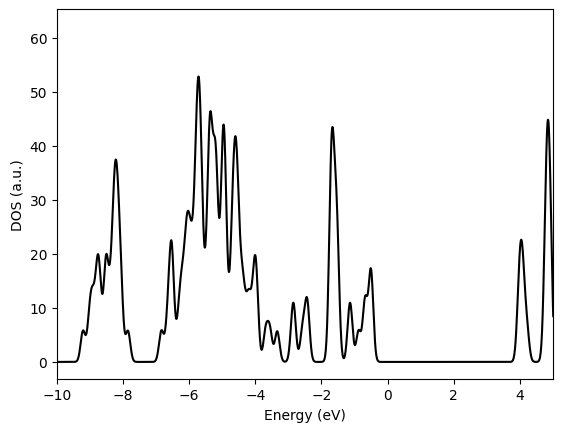

In [62]:

import numpy as np
import matplotlib.pyplot as plt

dos_tot=np.loadtxt("dos.dat")
plt.plot(dos_tot[:,0],dos_tot[:,1],color="black")
plt.xlim(-10,5)
plt.xlabel("Energy (eV)")
plt.ylabel("DOS (a.u.)")